In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
from string import punctuation

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model
#from keras.optimizers import Adam
from keras.datasets import fashion_mnist
from keras import models, layers, optimizers, utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten, ELU, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l2
# from keras.preprocessing  import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import h5py

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [5]:
num_classes = 10
classes = { 0:"airplane(літак)",
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

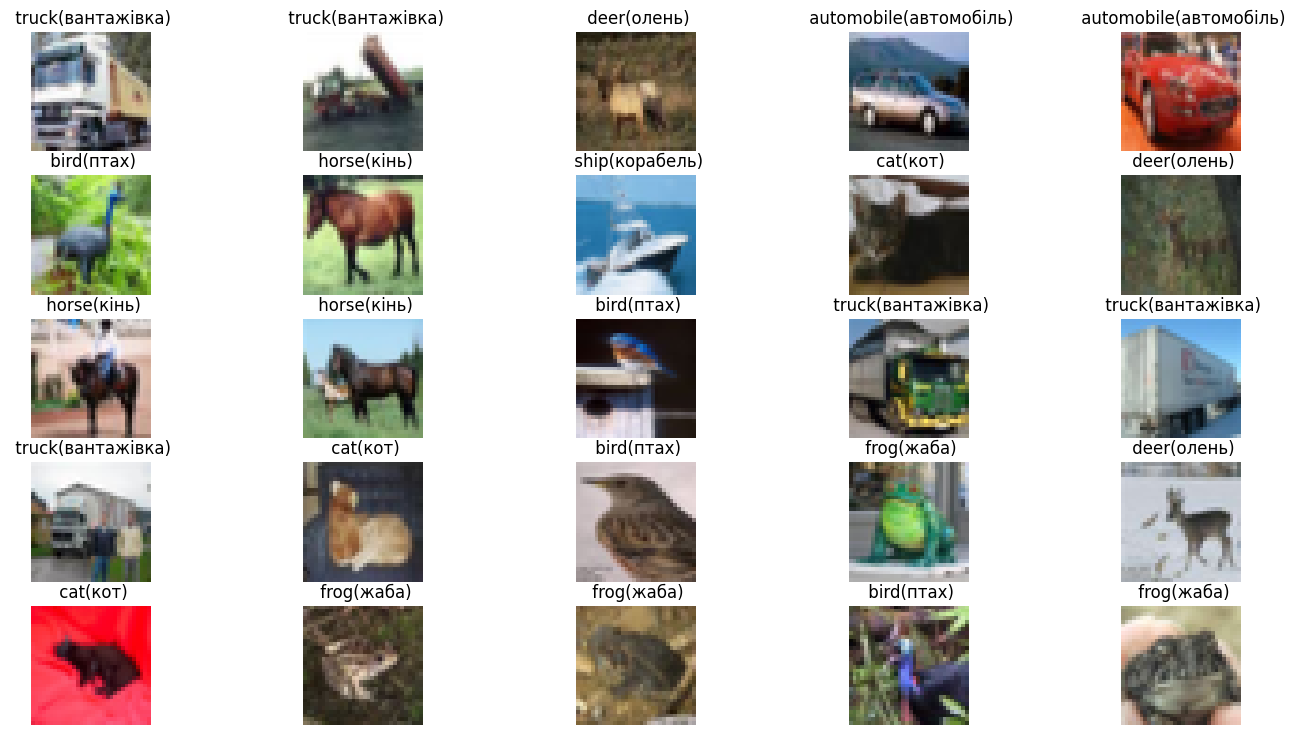

In [6]:
plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")

In [7]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.3
    )
datagen.fit(x_train)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)
input_shape = (32,32, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [9]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [10]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
# model = models.load_model("basesd_model_new.h5")

In [12]:
reg = None
reg2 = None
num_filters = 32
ac = 'elu'
drop_dense = 0.5
drop_conv = 0.3
input_shape = (32, 32, 3)

model = Sequential(name='cifar10_improved_v2')

# Використання Input як першого шару
model.add(Input(shape=input_shape))

# Перший блок Conv2D
model.add(Conv2D(num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(ELU())
model.add(Conv2D(num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(ELU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

# Другий блок Conv2D
model.add(Conv2D(2 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(ELU())
model.add(Conv2D(2 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(ELU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

# Третій блок Conv2D
model.add(Conv2D(4 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(ELU())
model.add(Conv2D(4 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(ELU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

# Четвертий блок Conv2D (додано)
model.add(Conv2D(8 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(ELU())
model.add(Conv2D(8 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(ELU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

# Dense Layers
model.add(Flatten())
model.add(Dense(2048, kernel_regularizer=reg2, name='hidden_1'))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(drop_dense))
model.add(Dense(2048, kernel_regularizer=reg2, name='hidden_2'))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(drop_dense))
model.add(Dense(1024, kernel_regularizer=reg2, name='hidden_4'))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(drop_dense))
model.add(Dense(512, kernel_regularizer=reg2, name='hidden_5'))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax', name='output'))

In [13]:
model.summary()

Model: "cifar10_improved_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu (ELU)                            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_1 (ELU)                          │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_2 (ELU)                          │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_3 (ELU)                          │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_4 (ELU)                          │ (None, 8, 8, 128)           │              

 Total params: 10,122,282 (38.61 MB)

 Trainable params: 10,109,098 (38.56 MB)

 Non-trainable params: 13,184 (51.50 KB)

In [14]:
# Компиляция модели с использованием RMSprop
opt = RMSprop(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# model = models.load_model("basesd_model_new.h5")

In [16]:
history=model.fit( x_train, y_train,
                  batch_size=256,
                  steps_per_epoch = int(len(x_train) / 256),
                  epochs=50,
                  validation_data=(x_test, y_test) )

Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 743s 4s/step - accuracy: 0.2584 - loss: 2.4026 - val_accuracy: 0.3461 - val_loss: 2.3535
Epoch 2/50
  1/195 ━━━━━━━━━━━━━━━━━━━━ 4:37 1s/step - accuracy: 0.4125 - loss: 1.5525

C:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.4125 - loss: 1.5525 - val_accuracy: 0.3022 - val_loss: 2.6488
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 678s 3s/step - accuracy: 0.4363 - loss: 1.6247 - val_accuracy: 0.5540 - val_loss: 1.4773
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.5625 - loss: 1.2350 - val_accuracy: 0.5685 - val_loss: 1.3853
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 759s 4s/step - accuracy: 0.5474 - loss: 1.2925 - val_accuracy: 0.6101 - val_loss: 1.2265
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.5625 - loss: 1.1132 - val_accuracy: 0.6214 - val_loss: 1.2062
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 722s 4s/step - accuracy: 0.6081 - loss: 1.1179 - val_accuracy: 0.6629 - val_loss: 1.0370
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.6000 - loss: 1.0675 - val_accuracy: 0.6511 - val_loss: 1.0946
Epoch 9/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 737s 4s/step - accuracy: 0.6449 - loss: 1.0098 - val_accuracy: 0

In [17]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Percentage of test data accuracy: ", round(result_test[1] * 100, 2))
print("Percentage of training data accuracy: ", round(result_train[1] * 100, 2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8228 - loss: 0.5412
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.9124 - loss: 0.2577
Percentage of test data accuracy:  82.3
Percentage of training data accuracy:  91.17


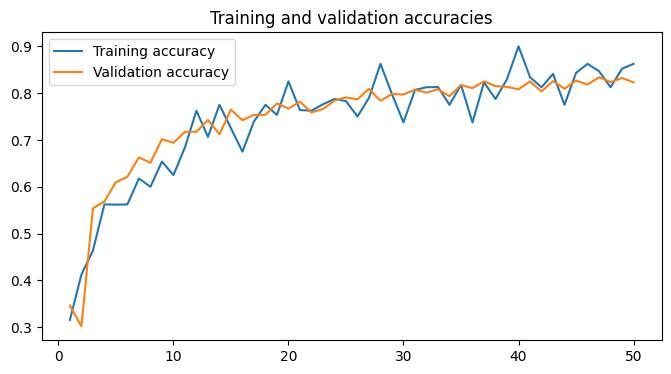

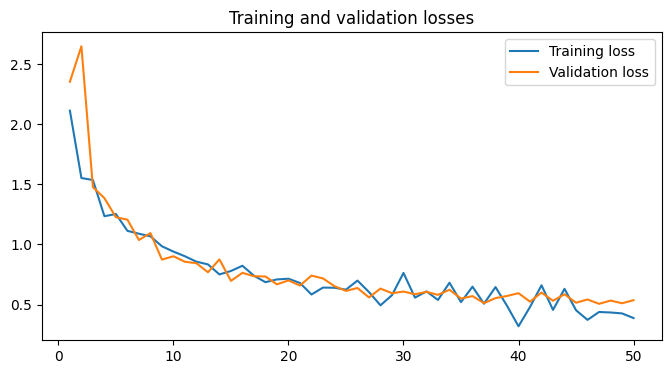

In [18]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["loss"],  label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validation loss")
plt.title("Training and validation losses")
plt.legend()
plt.show()

In [19]:
# model.save("basesd_model_new.hdf5")

In [20]:
model.save("basesd_model_old.h5")

In [21]:
# model = models.load_model("basesd_model_new.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Клас номер: 7
Клас img : horse(кінь)


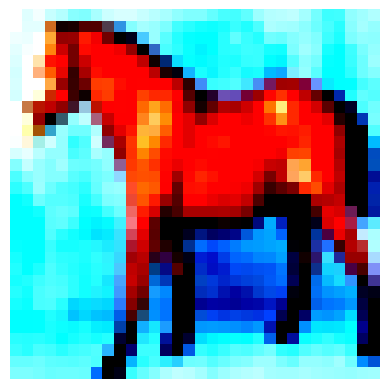

In [22]:
imege_number = 1170

x = np.expand_dims(x_test[imege_number], axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])

# classes[y_train[imege_number][0]]
plt.axis('off')

plt.imshow(x_test[imege_number] ,  cmap=plt.cm.binary)

print(f"Клас номер: {prediction}")
print(f"Клас img : {classes[prediction]}")